In [64]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [209]:
df = pd.read_csv('houseprice.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [164]:
df['MoSold'].value_counts()

6     253
7     234
5     204
4     141
8     122
3     106
10     89
11     79
9      63
12     59
1      58
2      52
Name: MoSold, dtype: int64

In [67]:
#pd.set_option('display.max_columns',None)

## display all columns of the dataframe
#pd.options.display.max_columns = None

# display all rows of the dataframe
#pd.options.display.max_rows = None

# returns an output value upto 6 decimals
#pd.options.display.float_format = '{:.6f}'.format


In [210]:
df.shape

(1460, 81)

In [211]:
for i in ['MoSold','YearBuilt','MSSubClass','OverallQual','OverallCond','YearRemodAdd','GarageYrBlt','YrSold']:
    df[i] = df[i].astype(object)
# Change to object as they are categorical variable

In [387]:
num_data = df.select_dtypes(include = np.number)
cat_data = df.select_dtypes(exclude = np.number)
num_data.shape

(1460, 30)

In [388]:
for i in num_data.columns:
    if (num_data[i].isna().sum()*100)/len(num_data[i]) > 90:
        num_data = num_data.drop(i,axis=1)
cat_data.shape # deleted columns which have more than 90% missing data

(1460, 51)

In [389]:
num_data.isna().sum()

Id                 0
LotFrontage      259
LotArea            0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
SalePrice          0
dtype: int64

In [390]:
from sklearn.impute import KNNImputer
fill_mod=KNNImputer(n_neighbors=3)
data_fill=fill_mod.fit_transform(num_data)
data_fill=pd.DataFrame(data_fill)
data_fill.columns=num_data.columns
num_data = data_fill

In [391]:
num_data.isna().sum().sum()

0

In [392]:
for i in num_data.columns:
    q1 = num_data[i].quantile(0.25)
    q3 = num_data[i].quantile(0.75)
    iqr = q3 - q1
    ub = q3 + 1.5*iqr
    lb = q1 - 1.5*iqr
    num_data[i] = num_data[i].replace(num_data[num_data[i]>ub][i],num_data[i].quantile(0.99))
    num_data[i] = num_data[i].replace(num_data[num_data[i]<lb][i],num_data[i].quantile(0.01))

In [393]:
for i in cat_data.columns:
    if (cat_data[i].isna().sum()*100)/len(cat_data) > 80:
        cat_data = cat_data.drop(i,axis=1)
cat_data.shape

(1460, 47)

In [394]:
cat_data.isna().sum()

MSSubClass         0
MSZoning           0
Street             0
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         8
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Heating            0
HeatingQC          0
CentralAir         0
Electrical         1
KitchenQual        0
Functional         0
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PavedDrive         0
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
dtype: int64

In [395]:
for i in cat_data.columns:
    cat_data.fillna(cat_data[i].mode()[0],inplace=True)

In [396]:
cat_data.isna().sum().sum()

0

In [397]:
for i in cat_data.columns:
    for j in cat_data[i].value_counts()*100/len(cat_data[i]):
        if j > 85:
            cat_data = cat_data.drop(i,axis=1)
            break
# Drop those columns whose 85% data are same type

In [405]:
cat_data['FireplaceQu'] = cat_data['FireplaceQu'].replace(20,'NA')
cat_data['BsmtQual'] = cat_data['BsmtQual'].replace(20,'NA')

In [348]:
from sklearn.preprocessing import LabelEncoder

In [407]:
lb = LabelEncoder()
for i in ['OverallQual','OverallCond']:
    cat_data[i] = lb.fit_transform(cat_data[i])
for i in ['ExterQual','BsmtQual','HeatingQC','KitchenQual','FireplaceQu']:
    cat_data[i] = lb.fit_transform(cat_data[i])

In [438]:
cat_data['ExterQual'].value_counts()

3    906
2    488
0     52
1     14
Name: ExterQual, dtype: int64

In [436]:
hotencoding = cat_data.drop(['OverallQual','OverallCond','ExterQual','BsmtQual','HeatingQC','KitchenQual','FireplaceQu'],axis = 1)
hotencoding = pd.get_dummies(hotencoding,drop_first=True)
hotencoding.shape

(1460, 119)

In [439]:
cat_data1 = pd.concat((hotencoding,cat_data[['OverallQual','OverallCond','ExterQual','BsmtQual','HeatingQC','KitchenQual','FireplaceQu']]),axis=1)
cat_data.shape

(1460, 29)

In [440]:
data = pd.concat((num_data,cat_data1),axis=1)
data = data.drop('Id',axis=1)
data.shape  # dataset without missing values and outliers and with encoding

(1460, 155)

In [441]:
data

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,OverallQual,OverallCond,ExterQual,BsmtQual,HeatingQC,KitchenQual,FireplaceQu
0,65.0,8450.0,196.0,706.0,0.00,150.0,856.0,856.0,854.0,0.0,...,0,1,0,6,4,2,2,0,2,3
1,80.0,9600.0,0.0,978.0,0.00,284.0,1262.0,1262.0,0.0,0.0,...,0,1,0,5,7,3,2,0,3,5
2,68.0,11250.0,162.0,486.0,0.00,434.0,920.0,920.0,866.0,0.0,...,0,1,0,6,4,2,2,0,2,5
3,60.0,9550.0,0.0,216.0,0.00,540.0,756.0,961.0,756.0,0.0,...,0,0,0,6,4,3,4,2,2,2
4,84.0,14260.0,350.0,655.0,0.00,490.0,1145.0,1145.0,1053.0,0.0,...,0,1,0,7,4,2,2,0,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,7917.0,0.0,0.0,0.00,953.0,953.0,953.0,694.0,0.0,...,0,1,0,5,4,3,2,0,3,5
1456,85.0,13175.0,119.0,790.0,830.38,589.0,1542.0,2073.0,0.0,0.0,...,0,1,0,5,5,3,2,4,3,5
1457,66.0,9042.0,0.0,275.0,0.00,877.0,1152.0,1188.0,1152.0,0.0,...,0,1,0,6,8,0,4,0,2,2
1458,68.0,9717.0,0.0,49.0,830.38,0.0,1078.0,1078.0,0.0,0.0,...,0,1,0,4,5,3,4,2,2,3


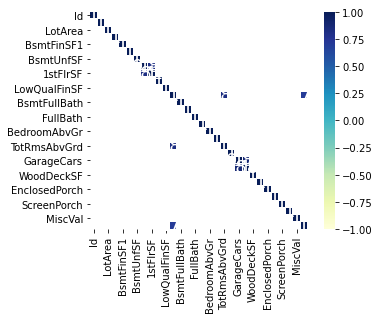

In [313]:
corr = df.corr()
sns.heatmap(corr[(corr >= 0.7) | (corr <= -0.7)], 
           cmap='YlGnBu', vmax=1.0, vmin=-1.0, linewidths=0.1,
           annot=True, annot_kws={"size": 18}, square=True);

In [105]:
from sklearn.preprocessing import StandardScaler

In [466]:
inp = data.drop('SalePrice',axis = 1)
out = data['SalePrice']

In [467]:
sc = StandardScaler()
inp_sc = sc.fit_transform(inp)
inp_sc = pd.DataFrame(inp_sc,columns=inp.columns)
inp_sc.shape  # scaled data

(1460, 154)

In [468]:
box_out,lam = stats.boxcox(out)

In [469]:
import statsmodels.api as sm

In [471]:
inpc = sm.add_constant(inp_sc)
ols = sm.OLS(box_out,inpc)
ols_mod = ols.fit()
ols_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     95.73
Date:                Tue, 06 Oct 2020   Prob (F-statistic):               0.00
Time:                        03:05:26   Log-Likelihood:                 2619.9
No. Observations:                1460   AIC:                            -4936.
Df Residuals:                    1308   BIC:                            -4132.
Df Model:                         151                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     7.4150      0.001   6667.611      0.000       7.413       7.417
LotFrontage               0.0017      0.002      0.935      0.350      -0.002       0.005
LotArea                   0.0046      0.002      2.599      0.009       0.001       0.008
MasVnrArea               -0.0011      0.002     -0.614      0.539      -0.005       0.002
BsmtFinSF1               -0.0066      0.005     -1.330      0.184      -0.016       0.003
BsmtFinSF2               -0.0051      0.002     -2.694      0.007      -0.009      -0.001
BsmtUnfSF                -0.0181      0.005     -3.461      0.001      -0.028      -0.008
TotalBsmtSF               0.0329      0.006      5.845      0.000       0.022       0.044
1stFlrSF                 -0.0209      0.008     -2.492      0.013      -0.037      -0.004
2ndFlrSF                 -0.0209      0.009     -2.207      0.027      -0.039      -0.002
LowQualFinSF             -0.0035      0.002     -2.189      0.029      -0.007      -0.000
GrLivArea                 0.0659      0.011      6.095      0.000       0.045       0.087
BsmtFullBath              0.0031      0.002      1.675      0.094      -0.001       0.007
BsmtHalfBath              0.0002      0.001      0.171      0.865      -0.002       0.003
FullBath                  0.0023      0.002      1.083      0.279      -0.002       0.007
HalfBath                  0.0044      0.002      2.317      0.021       0.001       0.008
BedroomAbvGr              0.0031      0.002      1.583      0.114      -0.001       0.007
KitchenAbvGr             -0.0045      0.002     -1.902      0.057      -0.009       0.000
TotRmsAbvGrd              0.0012      0.003      0.432      0.666      -0.004       0.006
Fireplaces                0.0053      0.002      3.424      0.001       0.002       0.008
GarageCars                0.0130      0.003      4.149      0.000       0.007       0.019
GarageArea                0.0027      0.003      0.864      0.388      -0.003       0.009
WoodDeckSF                0.0047      0.001      3.559      0.000       0.002       0.007
OpenPorchSF               0.0011      0.001      0.836      0.403      -0.001       0.004
EnclosedPorch             0.0031      0.001      2.186      0.029       0.000       0.006
3SsnPorch                 0.0018      0.001      1.546      0.122      -0.000       0.004
ScreenPorch               0.0046      0.001      3.762      0.000       0.002       0.007
PoolArea               -3.84e-16   7.44e-16     -0.516      0.606   -1.84e-15    1.08e-15
MiscVal                  -0.0012      0.001     -1.028      0.304      -0.004       0.001
MSSubClass               -0.0037      0.006     -0.619      0.536      -0.016       0.008
YearBuilt                 0.0162      0.004      4.148      0.000       0.009       0.024
YearRemodAdd           

In [472]:
columns = ols_mod.pvalues[ols_mod.pvalues<0.05]
len(columns)

39

In [473]:
new_data = pd.DataFrame(inp_sc,columns = columns.index)
new_data = new_data.drop('const',axis=1)
new_data

,LotArea,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,HalfBath,Fireplaces,...,Foundation_CBlock,Foundation_PConc,Foundation_Stone,SaleCondition_Alloca,SaleCondition_Normal,SaleCondition_Partial,OverallQual,OverallCond,ExterQual,HeatingQC
0,-0.315018,-0.359384,-0.950711,-0.481225,-0.827226,1.169863,-0.134652,0.393159,1.227585,-0.960998,...,-0.876102,1.120968,-0.064238,-0.091035,0.467651,-0.305995,0.651479,-0.517200,-0.777976,-0.884658
1,-0.143376,-0.359384,-0.644467,0.521305,0.285243,-0.797725,-0.134652,-0.495140,-0.761621,0.615470,...,1.141420,-0.892086,-0.064238,-0.091035,0.467651,-0.305995,-0.071836,2.179628,0.663451,-0.884658
2,0.102895,-0.359384,-0.301658,-0.323191,-0.651861,1.197511,-0.134652,0.543853,1.227585,0.615470,...,-0.876102,1.120968,-0.064238,-0.091035,0.467651,-0.305995,0.651479,-0.517200,-0.777976,-0.884658
3,-0.150838,-0.359384,-0.059405,-0.728154,-0.539518,0.944074,-0.134652,0.407039,-0.761621,0.615470,...,-0.876102,-0.892086,-0.064238,-0.091035,-2.138345,-0.305995,0.651479,-0.517200,0.663451,0.265476
4,0.552151,-0.359384,-0.173675,0.232398,-0.035345,1.628353,-0.134652,1.360771,1.227585,0.615470,...,-0.876102,1.120968,-0.064238,-0.091035,0.467651,-0.305995,1.374795,-0.517200,-0.777976,-0.884658
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,-0.394571,-0.359384,0.884464,-0.241704,-0.561439,0.801229,-0.134652,0.268242,1.227585,0.615470,...,-0.876102,1.120968,-0.064238,-0.091035,0.467651,-0.305995,-0.071836,-0.517200,0.663451,-0.884658
1456,0.390210,2.782538,0.052579,1.212704,2.507439,-0.797725,-0.134652,1.112919,-0.761621,2.191938,...,1.141420,-0.892086,-0.064238,-0.091035,0.467651,-0.305995,-0.071836,0.381743,0.663451,1.415610
1457,-0.226660,-0.359384,0.710774,0.249683,0.082478,1.856445,-0.134652,1.642330,-0.761621,2.191938,...,-0.876102,-0.892086,15.567059,-0.091035,0.467651,-0.305995,0.651479,3.078570,-3.660830,-0.884658
1458,-0.125913,2.782538,-1.293521,0.066956,-0.218930,-0.797725,-0.134652,-0.859978,-0.761621,-0.960998,...,1.141420,-0.892086,-0.064238,-0.091035,0.467651,-0.305995,-0.795151,0.381743,0.663451,0.265476


In [474]:
inpc = sm.add_constant(new_data)
ols = sm.OLS(box_out,inpc)
ols_mod = ols.fit()
ols_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     348.5
Date:                Tue, 06 Oct 2020   Prob (F-statistic):               0.00
Time:                        03:06:20   Log-Likelihood:                 2506.6
No. Observations:                1460   AIC:                            -4935.
Df Residuals:                    1421   BIC:                            -4729.
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     7.4150      0.001   6430.846      0.000       7.413       7.417
LotArea                   0.0071      0.001      4.968      0.000       0.004       0.010
BsmtFinSF2               -0.0037      0.001     -2.977      0.003      -0.006      -0.001
BsmtUnfSF                -0.0160      0.001    -11.292      0.000      -0.019      -0.013
TotalBsmtSF               0.0304      0.002     12.889      0.000       0.026       0.035
1stFlrSF                 -0.0211      0.008     -2.731      0.006      -0.036      -0.006
2ndFlrSF                 -0.0259      0.009     -2.967      0.003      -0.043      -0.009
LowQualFinSF             -0.0036      0.001     -2.516      0.012      -0.006      -0.001
GrLivArea                 0.0721      0.010      7.213      0.000       0.052       0.092
HalfBath                  0.0020      0.002      1.248      0.212      -0.001       0.005
Fireplaces                0.0071      0.001      4.901      0.000       0.004       0.010
GarageCars                0.0171      0.002     10.233      0.000       0.014       0.020
WoodDeckSF                0.0048      0.001      3.804      0.000       0.002       0.007
EnclosedPorch             0.0032      0.001      2.373      0.018       0.001       0.006
ScreenPorch               0.0044      0.001      3.609      0.000       0.002       0.007
YearBuilt                 0.0227      0.003      8.543      0.000       0.017       0.028
YearRemodAdd              0.0051      0.002      2.823      0.005       0.002       0.009
MSZoning_FV               0.0332      0.003     10.007      0.000       0.027       0.040
MSZoning_RH               0.0142      0.002      7.458      0.000       0.010       0.018
MSZoning_RL               0.0577      0.006      9.492      0.000       0.046       0.070
MSZoning_RM               0.0401      0.005      7.540      0.000       0.030       0.051
LotShape_IR3             -0.0029      0.001     -2.462      0.014      -0.005      -0.001
LotConfig_CulDSac         0.0027      0.001      2.252      0.024       0.000       0.005
Neighborhood_Crawfor      0.0075      0.001      6.020      0.000       0.005       0.010
Neighborhood_Edwards     -0.0049      0.001     -3.978      0.000      -0.007      -0.002
Neighborhood_MeadowV     -0.0042      0.001     -2.832      0.005      -0.007      -0.001
Neighborhood_NridgHt      0.0071      0.001      5.250      0.000       0.004       0.010
Neighborhood_StoneBr      0.0040      0.001      3.289      0.001       0.002       0.006
Exterior2nd_CmentBd       0.0004      0.001      0.261      0.794      -0.002       0.003
Foundation_CBlock         0.0026      0.002      1.119      0.263      -0.002       0.007
Foundation_PConc          0.0104      0.003      3.796      0.000       0.005       0.016
Foundation_Stone       

In [476]:
columns = ols_mod.pvalues[ols_mod.pvalues<0.05]
len(columns)

34

In [477]:
new_data1 = pd.DataFrame(new_data,columns = columns.index)
new_data1 = new_data1.drop('const',axis=1)
new_data1

,LotArea,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,Fireplaces,GarageCars,...,Neighborhood_MeadowV,Neighborhood_NridgHt,Neighborhood_StoneBr,Foundation_PConc,Foundation_Stone,SaleCondition_Normal,SaleCondition_Partial,OverallQual,OverallCond,HeatingQC
0,-0.315018,-0.359384,-0.950711,-0.481225,-0.827226,1.169863,-0.134652,0.393159,-0.960998,0.319730,...,-0.10854,-0.235958,-0.131991,1.120968,-0.064238,0.467651,-0.305995,0.651479,-0.517200,-0.884658
1,-0.143376,-0.359384,-0.644467,0.521305,0.285243,-0.797725,-0.134652,-0.495140,0.615470,0.319730,...,-0.10854,-0.235958,-0.131991,-0.892086,-0.064238,0.467651,-0.305995,-0.071836,2.179628,-0.884658
2,0.102895,-0.359384,-0.301658,-0.323191,-0.651861,1.197511,-0.134652,0.543853,0.615470,0.319730,...,-0.10854,-0.235958,-0.131991,1.120968,-0.064238,0.467651,-0.305995,0.651479,-0.517200,-0.884658
3,-0.150838,-0.359384,-0.059405,-0.728154,-0.539518,0.944074,-0.134652,0.407039,0.615470,1.672792,...,-0.10854,-0.235958,-0.131991,-0.892086,-0.064238,-2.138345,-0.305995,0.651479,-0.517200,0.265476
4,0.552151,-0.359384,-0.173675,0.232398,-0.035345,1.628353,-0.134652,1.360771,0.615470,1.672792,...,-0.10854,-0.235958,-0.131991,1.120968,-0.064238,0.467651,-0.305995,1.374795,-0.517200,-0.884658
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,-0.394571,-0.359384,0.884464,-0.241704,-0.561439,0.801229,-0.134652,0.268242,0.615470,0.319730,...,-0.10854,-0.235958,-0.131991,1.120968,-0.064238,0.467651,-0.305995,-0.071836,-0.517200,-0.884658
1456,0.390210,2.782538,0.052579,1.212704,2.507439,-0.797725,-0.134652,1.112919,2.191938,0.319730,...,-0.10854,-0.235958,-0.131991,-0.892086,-0.064238,0.467651,-0.305995,-0.071836,0.381743,1.415610
1457,-0.226660,-0.359384,0.710774,0.249683,0.082478,1.856445,-0.134652,1.642330,2.191938,-1.033331,...,-0.10854,-0.235958,-0.131991,-0.892086,15.567059,0.467651,-0.305995,0.651479,3.078570,-0.884658
1458,-0.125913,2.782538,-1.293521,0.066956,-0.218930,-0.797725,-0.134652,-0.859978,-0.960998,-1.033331,...,-0.10854,-0.235958,-0.131991,-0.892086,-0.064238,0.467651,-0.305995,-0.795151,0.381743,0.265476


In [478]:
inpc = sm.add_constant(new_data1)
ols = sm.OLS(box_out,inpc)
ols_mod = ols.fit()
ols_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     400.6
Date:                Tue, 06 Oct 2020   Prob (F-statistic):               0.00
Time:                        03:07:43   Log-Likelihood:                 2503.2
No. Observations:                1460   AIC:                            -4938.
Df Residuals:                    1426   BIC:                            -4759.
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     7.4150      0.001   6427.111      0.000       7.413       7.417
LotArea                   0.0072      0.001      5.000      0.000       0.004       0.010
BsmtFinSF2               -0.0037      0.001     -2.982      0.003      -0.006      -0.001
BsmtUnfSF                -0.0162      0.001    -11.508      0.000      -0.019      -0.013
TotalBsmtSF               0.0306      0.002     13.515      0.000       0.026       0.035
1stFlrSF                 -0.0211      0.008     -2.755      0.006      -0.036      -0.006
2ndFlrSF                 -0.0246      0.009     -2.829      0.005      -0.042      -0.008
LowQualFinSF             -0.0037      0.001     -2.573      0.010      -0.007      -0.001
GrLivArea                 0.0719      0.010      7.221      0.000       0.052       0.091
Fireplaces                0.0073      0.001      5.083      0.000       0.005       0.010
GarageCars                0.0170      0.002     10.234      0.000       0.014       0.020
WoodDeckSF                0.0048      0.001      3.735      0.000       0.002       0.007
EnclosedPorch             0.0031      0.001      2.246      0.025       0.000       0.006
ScreenPorch               0.0044      0.001      3.644      0.000       0.002       0.007
YearBuilt                 0.0242      0.002      9.834      0.000       0.019       0.029
YearRemodAdd              0.0049      0.002      2.735      0.006       0.001       0.008
MSZoning_FV               0.0333      0.003     10.151      0.000       0.027       0.040
MSZoning_RH               0.0140      0.002      7.412      0.000       0.010       0.018
MSZoning_RL               0.0582      0.006      9.685      0.000       0.046       0.070
MSZoning_RM               0.0402      0.005      7.643      0.000       0.030       0.051
LotShape_IR3             -0.0030      0.001     -2.562      0.011      -0.005      -0.001
LotConfig_CulDSac         0.0027      0.001      2.259      0.024       0.000       0.005
Neighborhood_Crawfor      0.0076      0.001      6.101      0.000       0.005       0.010
Neighborhood_Edwards     -0.0050      0.001     -4.073      0.000      -0.007      -0.003
Neighborhood_MeadowV     -0.0039      0.001     -3.119      0.002      -0.006      -0.001
Neighborhood_NridgHt      0.0066      0.001      5.009      0.000       0.004       0.009
Neighborhood_StoneBr      0.0039      0.001      3.212      0.001       0.002       0.006
Foundation_PConc          0.0078      0.002      4.252      0.000       0.004       0.011
Foundation_Stone          0.0022      0.001      1.902      0.057    -7.1e-05       0.005
SaleCondition_Normal      0.0093      0.002      5.918      0.000       0.006       0.012
SaleCondition_Partial     0.0110      0.002      6.418      0.000       0.008       0.014
OverallQual            

In [88]:
from sklearn.linear_model import LinearRegression,Lasso
from sklearn.model_selection import cross_val_score

In [479]:
lr = LinearRegression()
mse = abs(cross_val_score(lr,new_data1,box_out,cv=3,scoring='neg_mean_squared_error'))
rmse = np.sqrt(mse)
be = np.mean(rmse)
ve = np.std(rmse)
cva = ve/be
[ve,be,cva]

[0.0026166338099347657, 0.046280456681610856, 0.05653863417848387]

In [482]:
lasso = Lasso(alpha=0.01)
mse = abs(cross_val_score(lasso,new_data1,box_out,cv=3,scoring='neg_mean_squared_error'))
rmse = np.sqrt(mse)
be = np.mean(rmse)
ve = np.std(rmse)
cva = ve/be
[ve,be,cva]

[0.0023900203985259697, 0.05570514386670691, 0.042904842041964535]

In [487]:
lasso_mod = lasso.fit(new_data1,box_out)
scorecard = pd.DataFrame()
scorecard['coef'] = lasso_mod.coef_
scorecard['Features'] = new_data1.columns
features = scorecard[scorecard['coef']>0]['Features']
len(features)

11

In [488]:
final_df = pd.DataFrame(new_data1,columns=features)
final_df

Features,LotArea,TotalBsmtSF,GrLivArea,Fireplaces,GarageCars,WoodDeckSF,YearBuilt,YearRemodAdd,MSZoning_RL,OverallQual,OverallCond
0,-0.315018,-0.481225,0.393159,-0.960998,0.319730,-0.765255,1.050994,0.878668,0.518133,0.651479,-0.517200
1,-0.143376,0.521305,-0.495140,0.615470,0.319730,1.669054,0.156734,-0.429577,0.518133,-0.071836,2.179628
2,0.102895,-0.323191,0.543853,0.615470,0.319730,-0.765255,0.984752,0.830215,0.518133,0.651479,-0.517200
3,-0.150838,-0.728154,0.407039,0.615470,1.672792,-0.765255,-1.863632,-0.720298,0.518133,0.651479,-0.517200
4,0.552151,0.232398,1.360771,0.615470,1.672792,0.803159,0.951632,0.733308,0.518133,1.374795,-0.517200
...,...,...,...,...,...,...,...,...,...,...,...
1455,-0.394571,-0.241704,0.268242,0.615470,0.319730,-0.765255,0.918511,0.733308,0.518133,-0.071836,-0.517200
1456,0.390210,1.212704,1.112919,2.191938,0.319730,2.085664,0.222975,0.151865,0.518133,-0.071836,0.381743
1457,-0.226660,0.249683,1.642330,2.191938,-1.033331,-0.765255,-1.002492,1.024029,0.518133,0.651479,3.078570
1458,-0.125913,0.066956,-0.859978,-0.960998,-1.033331,2.224534,-0.704406,0.539493,0.518133,-0.795151,0.381743


In [489]:
inpc = sm.add_constant(final_df)
ols = sm.OLS(box_out,inpc)
ols_mod = ols.fit()
ols_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     881.6
Date:                Tue, 06 Oct 2020   Prob (F-statistic):               0.00
Time:                        03:11:27   Log-Likelihood:                 2292.6
No. Observations:                1460   AIC:                            -4561.
Df Residuals:                    1448   BIC:                            -4498.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            7.4150      0.001   5606.598      0.000       7.412       7.418
LotArea          0.0063      0.002      4.058      0.000       0.003       0.009
TotalBsmtSF      0.0236      0.002     13.904      0.000       0.020       0.027
GrLivArea        0.0423      0.002     22.242      0.000       0.039       0.046
Fireplaces       0.0110      0.002      6.993      0.000       0.008       0.014
GarageCars       0.0188      0.002     10.158      0.000       0.015       0.022
WoodDeckSF       0.0040      0.001      2.856      0.004       0.001       0.007
YearBuilt        0.0303      0.002     13.100      0.000       0.026       0.035
YearRemodAdd     0.0093      0.002      4.898      0.000       0.006       0.013
MSZoning_RL      0.0096      0.001      6.455      0.000       0.007       0.013
OverallQual      0.0362      0.002     15.899      0.000       0.032       0.041
OverallCond      0.0216      0.002     13.537      0.000       0.019       0.025
==============================================================================
Omnibus:                      507.774   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5109.480
Skew:                          -1.323   Prob(JB):                         0.00
Kurtosis:                      11.775   Cond. No.                         4.55
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""